##Name: Namita Warang
##Roll no. 22102B2008
##BE CMPN B
Github link:   https://github.com/NamitaWarang/Machine_learning


##EXPERIMENT 6: SVM

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the Wine Quality dataset
wine_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality_data = pd.read_csv(wine_dataset_url, sep=';')

In [4]:
# Data exploration
print("Wine Data Information:")
wine_quality_data_info = wine_quality_data.info()
print("\nWine Data Description:")
wine_quality_data_stats = wine_quality_data.describe()

Wine Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Wine Data Description:


In [5]:
# Feature-target separation
wine_features = wine_quality_data.iloc[:, :-1]
wine_target = wine_quality_data['quality']

In [6]:
# Splitting the dataset into training and test sets
train_X_wine, test_X_wine, train_y_wine, test_y_wine = train_test_split(wine_features, wine_target, test_size=0.3, random_state=42)


In [7]:
# Scaling features using MinMaxScaler
normalizer = MinMaxScaler()
train_X_wine_scaled = normalizer.fit_transform(train_X_wine)
test_X_wine_scaled = normalizer.transform(test_X_wine)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [9]:
# Initialize the SVM classifier
wine_svm = SVC(kernel='linear', probability=True)


In [10]:
# Train the classifier
wine_svm.fit(train_X_wine_scaled, train_y_wine)

SVC(kernel='linear', probability=True)

In [11]:
# Make predictions on the test set
wine_predictions = wine_svm.predict(test_X_wine_scaled)

In [12]:
# Performance evaluation
wine_accuracy = accuracy_score(test_y_wine, wine_predictions)
wine_precision = precision_score(test_y_wine, wine_predictions, average='macro')
wine_recall = recall_score(test_y_wine, wine_predictions, average='macro')
wine_f1 = f1_score(test_y_wine, wine_predictions, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Output performance metrics
print(f"Accuracy: {wine_accuracy:.4f}")
print(f"Precision: {wine_precision:.4f}")
print(f"Recall: {wine_recall:.4f}")
print(f"F1 Score: {wine_f1:.4f}")


Accuracy: 0.5521
Precision: 0.1829
Recall: 0.2241
F1 Score: 0.2011


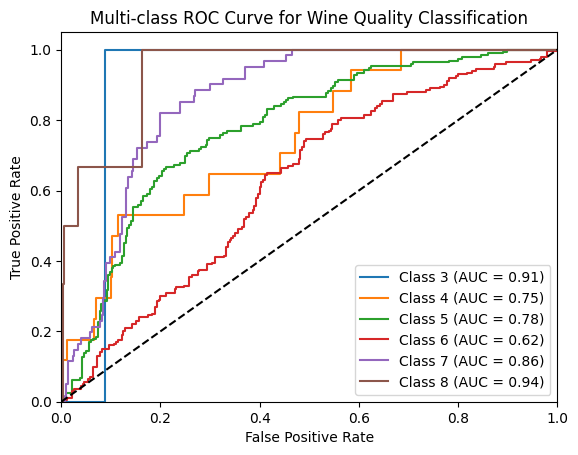

In [24]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output labels for multi-class ROC curve
lb = LabelBinarizer()
test_y_wine_bin = lb.fit_transform(test_y_wine)

# Get predicted probabilities for each class
y_proba_wine = wine_svm.decision_function(test_X_wine_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(test_y_wine_bin[:, i], y_proba_wine[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for Wine Quality Classification')
plt.legend(loc='lower right')
plt.show()


concrete comprehensive strength

In [14]:
# Load Concrete Compressive Strength dataset
concrete_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data = pd.read_excel(concrete_url)

# Data exploration
print("Concrete Data Information:")
concrete_data_info = concrete_data.info()
print("\nConcrete Data Description:")
concrete_data_stats = concrete_data.describe()

Concrete Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive s

In [15]:
# Confirm column names
print("Concrete Data Columns:", concrete_data.columns)

# Correct target variable column name (based on your dataset output)
target = 'Concrete compressive strength(MPa, megapascals) '

Concrete Data Columns: Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [16]:
# Feature-target separation for concrete data
concrete_features = concrete_data.drop(columns=[target])
concrete_target = concrete_data[target]

# Split the dataset for regression task
train_X_concrete, test_X_concrete, train_y_concrete, test_y_concrete = train_test_split(concrete_features, concrete_target, test_size=0.3, random_state=42)


In [17]:
# Apply scaling to the concrete data
concrete_scaler = MinMaxScaler()
train_X_concrete_scaled = concrete_scaler.fit_transform(train_X_concrete)
test_X_concrete_scaled = concrete_scaler.transform(test_X_concrete)

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Initialize and train the SVR model
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(train_X_concrete_scaled, train_y_concrete)

# Predict on the test set
concrete_predictions = svr_regressor.predict(test_X_concrete_scaled)

In [20]:
# Performance metrics for regression
mse_value = mean_squared_error(test_y_concrete, concrete_predictions)
r2_value = r2_score(test_y_concrete, concrete_predictions)

# Display results
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"R-squared: {r2_value:.4f}")

Mean Squared Error (MSE): 131.0675
R-squared: 0.5156


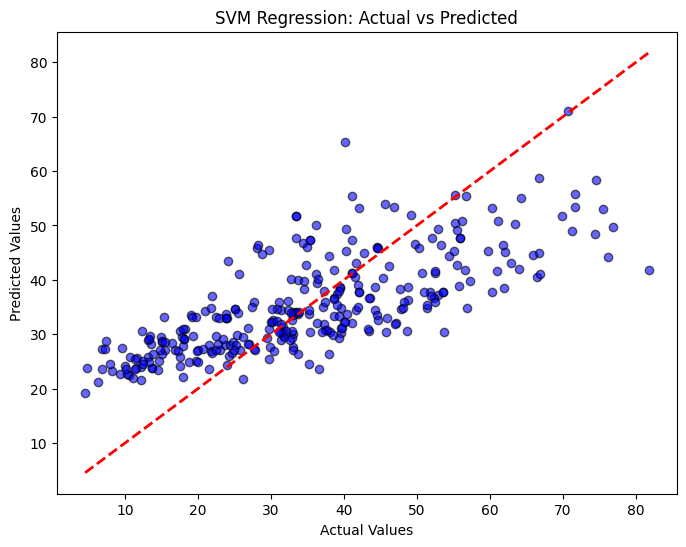

In [21]:
# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(test_y_concrete, concrete_predictions, color='blue', edgecolors='k', alpha=0.6)
plt.plot([test_y_concrete.min(), test_y_concrete.max()], [test_y_concrete.min(), test_y_concrete.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted')
plt.show()